# Physics 5730 - Homework 3

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

## Problem 1

Let’s do some benchmarking to gain better appreciation of a tradeoff between parametric t-test and non-parametric Wilcoxon ranksum test.

We already met Generalized Pareto (GP) distribution. As a reminder, this distribution (discussed in class) has three parameters: tail index (shape) parameter K, scale parameter S, and threshold (location) parameter T. S and T parameters are kind of boring so let’s fix them at S=1 and T=0. In python, you are likely using scipy.stats.genpareto, in which case the choice of S=1 and T=0 is already coded in and you only have the shape parameter (called C rather than K in standard python reference).

OK, so the cool thing is that for C=0 (and T=0) this distribution reduces to the exponential one. As we increase C the shape changes, as you know. So generate some data (maybe 100 data points for each case) for C=0 and test it’s mean against data for another GP distribution for range of K from 0 to 10. Use two sided t-test vs the Wilcoxon rank sum test (both of which we discussed in class). Look at the average p-value you get from a few runs for each value of K in our range. What can you conclude about t-test vs non-parametric test for long-tailed data sets?

Grading rubric: 20 points total (15 point – benchmarking; 5 points for quality of comments)

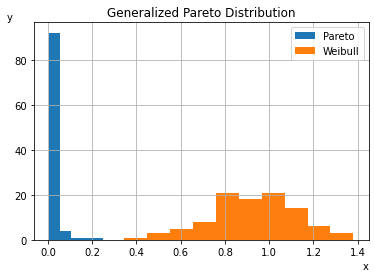

t-test p-value: 4.417521386399011e-57 , Wilcoxon p-value: 2.68023743241634e-34


In [173]:
# Problem 1
#
# This program will benchmark the difference between parametric t-test and non-parametric Wilcoxon ranksum test. It will generate random data and test different cases for C in a Generalized Pareto distribution
# and find different p-values to come to a conclusion of whether t-test or non parametric tests work better for long-tailed data sets.
#
# @author Scott Merkley
# @version February 13, 2022

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Creating N data points
N = 100
x = np.linspace(0.01, 2, N)

# Creating Generalized Pateto and Weibull Distributions
y = stats.genpareto.pdf(x, N)
y1 = np.random.weibull(5, N)

# Plotting the Pareto Distribution
plt.title('Generalized Pareto Distribution')
plt.xlabel('x', loc = 'right')
plt.ylabel('y', rotation = 0, loc = 'top', labelpad = 1)
# plt.plot(x, y, 'b.', label = 'Pareto')
# plt.plot(x, y1, 'r.', label = 'Weibull')
plt.hist(y, bins = (int) (np.sqrt(N)), label = 'Pareto')
plt.hist(y1, bins = (int) (np.sqrt(N)), label = 'Weibull')
plt.legend()
plt.grid()
plt.show()


# Generating a Students t-test
# print(stats.ttest_1samp(y, np.mean(y) - 0.01))
# print(stats.ttest_1samp(y, y1))

# result = stats.ttest_ind(y, y1)
# result = stats.wilcoxon(y, y1)

# Running t-test and Wilcoxon test
ttestResult = stats.ks_2samp(y, y1)
wilcoxonResult = stats.ranksums(y, y1)

print(f't-test p-value: {ttestResult[1]} , Wilcoxon p-value: {wilcoxonResult[1]}')

## Problem 2

I attach a zip file Dists.zip which contains five ascii format data.

Each data set has random variables in it, generated from one of the following distributions:

- Weibull
- Generalized Pareto
- Lévy distribution
- Lognormal

So clearly some vectors were generated from the same pdf family. And you have no guarantees that all four distributions were used... perhaps all five are lognormal r.v.’s. Or maybe not.

You can do a slight bit of digging into the properties of these distributions. For example, Levy is a new one for us but it comes up a lot in research and it is a good family of distributions to be aware of.

Your mission, should you choose to accept it, is to tell me <u>**which data comes from which distribution and how you came to that conclusion.**</u> To make your job a bit harder, I have cut off all data below 1 because otherwise telling lognormal r.v.’s from the rest would be too easy.

(To be clear: I generated many r.v.’s and then truncated all values below 1. You are only looking at the tails of pdf’s here.)

Grading rubric: 16 points per data set (6 point – correct ID; 10 – explanation and reasoning behind the ID)



---------------------------------------------
                   D1.txt
---------------------------------------------



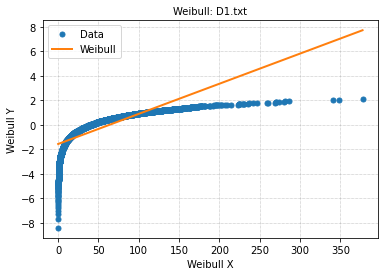

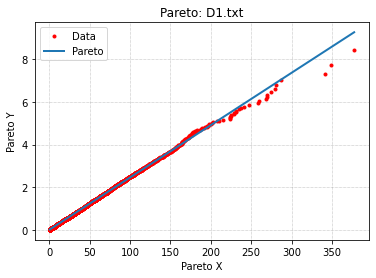

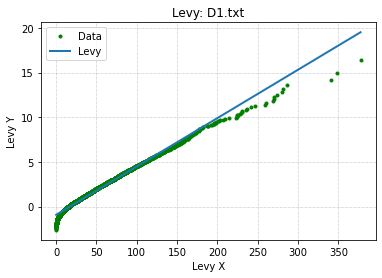

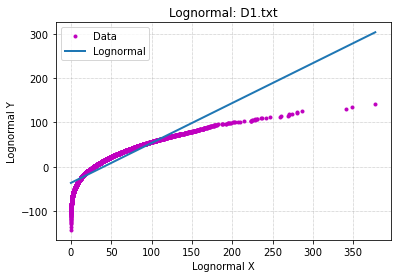








---------------------------------------------
                   D2.txt
---------------------------------------------



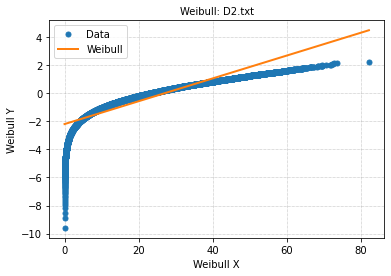

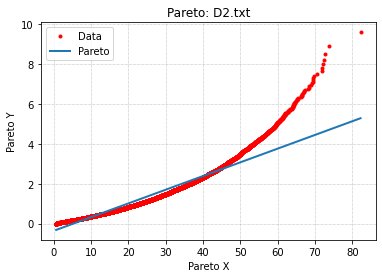

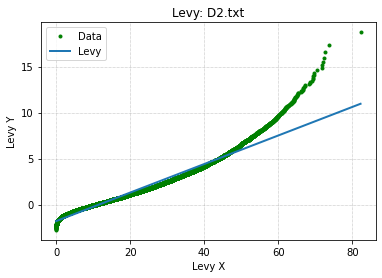

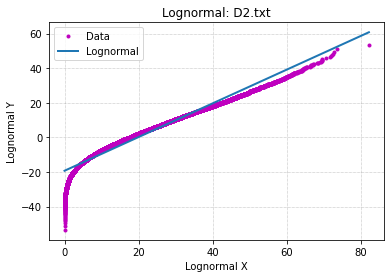








---------------------------------------------
                   D3.txt
---------------------------------------------



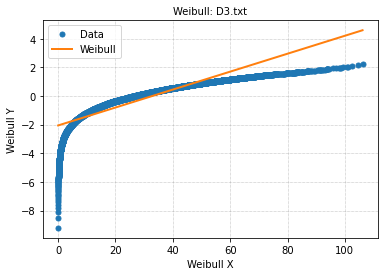

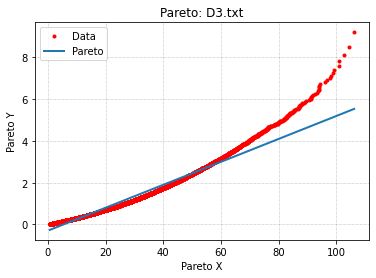

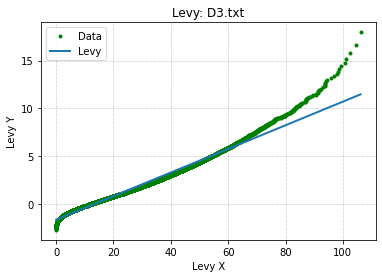

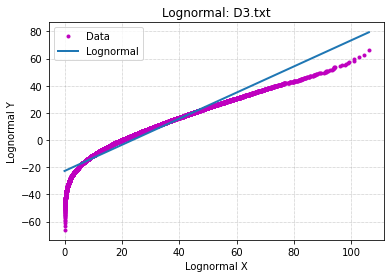








---------------------------------------------
                   D4.txt
---------------------------------------------



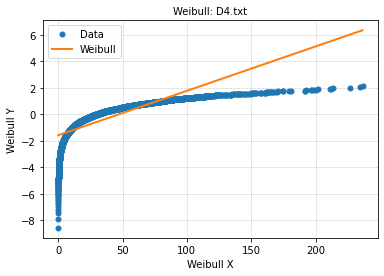

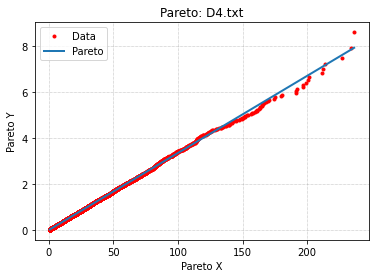

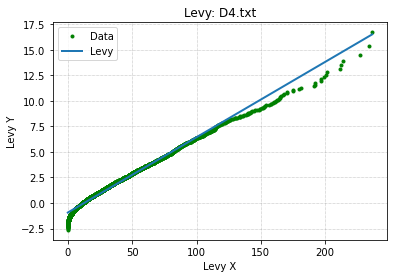

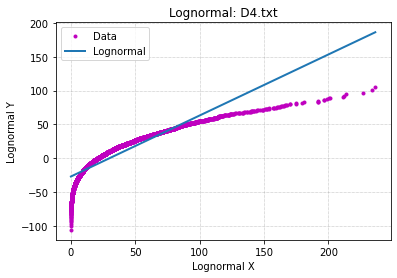








---------------------------------------------
                   D5.txt
---------------------------------------------



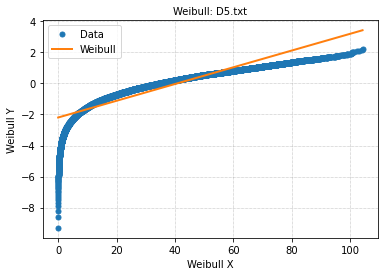

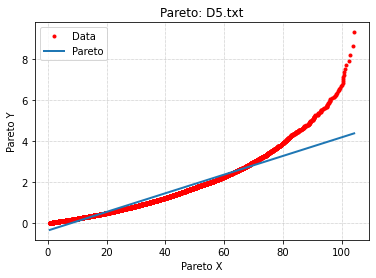

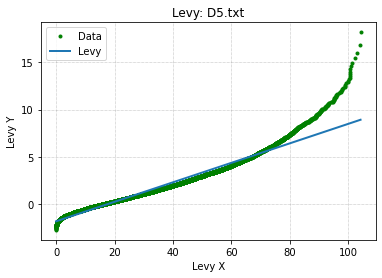

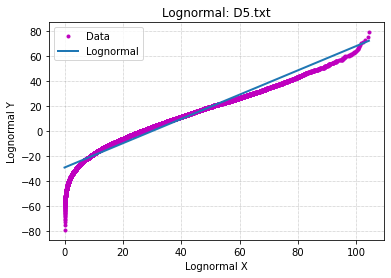

In [159]:
# Problem 2
#
# This program analyzes the given data files and finds which distribution they correspond too.
#
# @author Scott Merkley
# @version February 17, 2022

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
import warnings
warnings.filterwarnings('ignore')
import glob, os
os.chdir(os.getcwd())

# Loop through all files with the specified name 
for filename in sorted(glob.glob("D*.txt")):
    
    print(f'\n\n---------------------------------------------\n                   {filename}\n---------------------------------------------\n')

    # Importing data from file
    data = pd.read_csv(filename, header = None).to_numpy()
    
    # Creating test data
#     data = np.random.weibull(1, 1000)                      # Random Weibull Data
#     data = np.random.lognormal(0, 1, 1000)                 # Random Lognormal Data
#     data = np.random.pareto(0.1, 1000)                     # Random Generalized Pareto Data 
#     data = stats.levy.pdf(np.linspace(1, 1.1, 1000))       # Random Lognormal Data
    

    
    # Generating ECDF for data
    ecdfX = np.sort(data.flatten()) 
    ecdfY = np.linspace(1, len(data), len(data)) / len(data)

    # Compute Weibull linearization
    WeibullX = np.log(ecdfX[:-1])
    WeibullY = np.log(np.log(1/(1-ecdfY[:-1])))

    # Plot the results with Weibull probability plot
    plt.plot(WeibullX,WeibullY,'.',markersize=10, label = 'Data')
    #Do a linear fit to data
    PolyCoeff=np.polyfit(WeibullX, WeibullY,1)
    plt.plot(WeibullX,np.polyval(PolyCoeff,WeibullX),linewidth=2, label = 'Weibull')
    #Add some gris lines and dump to screen
    plt.title(f'Weibull: {filename}',  fontsize=10)
    plt.grid(color='gray', linestyle='dotted', linewidth=.5)
    plt.grid(visible=True)
    plt.xlabel('Weibull X', fontsize=10)
    plt.ylabel('Weibull Y', fontsize=10)
    # plt.rcParams['figure.figsize'] = [30, 15]
    plt.xticks();
    plt.yticks();
    plt.legend(loc = 2)
    plt.show()



    # Compute the Generalized Pareto Linearization
    paretoX = np.log(1 + ecdfX[:-1])
    paretoY = np.log(1 / (1 - ecdfY[:-1]))

    # Plot the results with Pareto Probability Plot
    plt.title(f'Pareto: {filename}')
    plt.plot(paretoX, paretoY, 'r.', label = 'Data')
    polyCoeff = np.polyfit(paretoX, paretoY, 1)
    plt.plot(paretoX, np.polyval(polyCoeff, paretoX), linewidth = 2, label = 'Pareto')
    plt.xlabel('Pareto X', fontsize=10)
    plt.ylabel('Pareto Y', fontsize=10)
    plt.legend(loc = 2)
    plt.grid(color='gray', linestyle='dotted', linewidth=.5)
    plt.show()



    # Compute the Levy Linearization
    levyX = np.log(ecdfX[:-1])
    levyY = np.log(1 / (2 * special.erfcinv(ecdfY[:-1])**2))

    # Plot the results with Levy Probability Plot
    plt.title(f'Levy: {filename}')
    plt.plot(levyX, levyY, 'g.', label = 'Data')
    polyCoeff = np.polyfit(levyX, levyY, 1)
    plt.plot(levyX, np.polyval(polyCoeff, levyX), linewidth = 2, label = 'Levy')
    plt.xlabel('Levy X', fontsize=10)
    plt.ylabel('Levy Y', fontsize=10)
    plt.legend(loc = 2)
    plt.grid(color='gray', linestyle='dotted', linewidth=.5)
    plt.show()



    # Compute the Lognormal Linearization
    lognormalX = np.log(ecdfX[:-1])
    lognormalY = np.std(lognormalX) * np.sqrt(2) * special.erfinv(2 * ecdfY[:-1] - 1)

    # Plot the Results with Lognormal Probability Plot
    plt.title(f'Lognormal: {filename}')
    plt.plot(lognormalX, lognormalY, 'm.', label = 'Data')
    polyCoeff = np.polyfit(lognormalX, lognormalY, 1)
    plt.plot(lognormalX, np.polyval(polyCoeff, lognormalX), linewidth = 2, label = 'Lognormal')
    plt.xlabel('Lognormal X', fontsize=10)
    plt.ylabel('Lognormal Y', fontsize=10)
    plt.legend(loc = 2)
    plt.grid(color='gray', linestyle='dotted', linewidth=.5)
    plt.show()
    
    print('\n\n\n\n')

In [ ]:
# For data set D1 based off the plots above, it looks like the data follows a Generalized Pareto distribution. The data also closely resembles a
# Levy distribution as well but with a lingering tail at the beginning and going a deviating a little further from the linearized Levy distribution.
#
# For data set D2 the data looks to follow most closely to a Lognormal distribution. It has a lingering tail at the beginning and deviates from the 
# plot but it is closer than any of the other plots seen above.
#
# The D3 data set does not follow any of the distributions particularly well. It looks to follow Levy most closely with a strong deviation towards
# higher values of X.
#
# The D4 data looks to be Generalized Pareto distribution. The Levy plot has a tail and deviates, while lognormal and Weibull are both curving very
# strongly.
#
# The D5 data does not look to follow any of the distributions well. It most closely resembles a Lognormal while still deviating greatly throughout
# the plot and having a tail.

In [116]:
# Practicing Recursion

def sum(x):
    if(x == 1):
        return 1
    return sum(x - 1) + x

sum(2)

3

In [117]:
data = np.random.normal(1, size = (int(1e4), 1))
ecdfX = np.sort(data.flatten()) 
ecdfY = np.linspace(1, len(data), len(data)) / len(data)
stats.probplot(data.flatten(), dist = 'norm')
plt.show()

# use this for data!!
# ecdf(d(d>0))
# probplot(d(d>0))

# plt.hist(data, bins = int(np.sqrt(1e4)))